In [161]:
import pandas as pd
import openpyxl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

df = pd.read_excel('TASK-2.xlsx')

## 1. Column-Wise Analysis

In [162]:
df.head(5)

,VIN,TRANSACTION_ID,CORRECTION_VERBATIM,CUSTOMER_VERBATIM,REPAIR_DATE,CAUSAL_PART_NM,GLOBAL_LABOR_CODE_DESCRIPTION,PLATFORM,BODY_STYLE,VPPC,...,TRANSMISSION_TRACE_NBR,SRC_TXN_ID,SRC_VER_NBR,TRANSACTION_CNTR,MEDIA_FLAG,VIN_MODL_DESGTR,LINE_SERIES,LAST_KNOWN_DELVRY_TYPE_CD,NON_CAUSAL_PART_QTY,SALES_REGION_CODE
0,3HCFDDE89SH220903,13021,REPLACED STEERING WHEEL NOW OKAY,STEERING WHEEL COMING APART,2024-01-02,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,...,S2210121CNJX0941,2808908219,6,1,N,CF10543,1500,21.0,0,1
1,1HRFFEE8XSZ230636,13028,CHECKED - FOUND DTC'S U0229 - U1530 SET IN BCM...,CUSTOMER STATES HEATED STEERING WHEEL INOP,2024-01-03,MODULE ASM-STRG WHL HT CONT,Heated Steering Wheel Module Replacement,Full-Size Trucks,Crew Cab,T1CGF,...,R2210881CNJX0287,2808841910,6,1,Y,TF10543,1500,10.0,0,1
2,1HYKSMRK6SZ000990,13035,APPROVED 4.9(OLH) FOR ADDED DIAGNOSTICS WITH T...,OWNER REPORTS: THE SUPER CRUISE BAR ON THE STE...,2024-01-04,WHEEL ASM-STRG *BACKEN BLACKK,Steering Wheel Replacement,BEV,4 Door Utility,L233-LSOP,...,NaN,2809979441,4,1,Y,6MB26,Lux-1,10.0,0,1
3,3HCFDFEL3SH241701,13021,STEERING WHEEL REPLACEMENT,CUSTOMER STATES THE LETTERING AND FINISH ON TH...,2024-01-04,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,...,S1210822CKJX0291,2808892288,6,1,Y,CF10543,1500,10.0,0,1
4,1HRFFHEL1RZ181474,13021,REPLACED STEERING MESSAGE NO LONGER DISPLAYED,C/S: CUSTOMER STATES THE SERVICE DRIVER ASSIST...,2024-01-05,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CGF,...,R2212982CKJX0282,2808901882,8,1,N,TF10543,1500,10.0,0,1


In [163]:
df.shape

(100, 52)

In [164]:
print("\nSummary Statistics:")
display(df.describe(include='all'))


Summary Statistics:


,VIN,TRANSACTION_ID,CORRECTION_VERBATIM,CUSTOMER_VERBATIM,REPAIR_DATE,CAUSAL_PART_NM,GLOBAL_LABOR_CODE_DESCRIPTION,PLATFORM,BODY_STYLE,VPPC,...,TRANSMISSION_TRACE_NBR,SRC_TXN_ID,SRC_VER_NBR,TRANSACTION_CNTR,MEDIA_FLAG,VIN_MODL_DESGTR,LINE_SERIES,LAST_KNOWN_DELVRY_TYPE_CD,NON_CAUSAL_PART_QTY,SALES_REGION_CODE
count,100,100.000000,100,100,100,95,100,100,100,100,...,88,1.000000e+02,100.000000,100.0,100,100,99.0,98.000000,100.000000,100.00000
unique,98,NaN,93,100,NaN,18,4,11,6,26,...,88,NaN,NaN,NaN,2,41,22.0,NaN,NaN,NaN
top,3HRS9EED0LH255650,NaN,REPLACED STEERING WHEEL,STEERING WHEEL COMING APART,NaN,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,...,S2210121CNJX0941,NaN,NaN,NaN,N,CF10543,1500.0,NaN,NaN,NaN
freq,2,NaN,3,1,NaN,45,78,52,50,20,...,1,NaN,NaN,NaN,62,15,52.0,NaN,NaN,NaN
mean,NaN,13036.900000,NaN,NaN,2024-01-22 07:26:24,NaN,NaN,NaN,NaN,NaN,...,NaN,2.815767e+09,5.720000,1.0,NaN,NaN,NaN,14.132653,0.070000,1.09000
min,NaN,13021.000000,NaN,NaN,2024-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,...,NaN,2.808842e+09,2.000000,1.0,NaN,NaN,NaN,10.000000,0.000000,1.00000
25%,NaN,13027.750000,NaN,NaN,2024-01-12 00:00:00,NaN,NaN,NaN,NaN,NaN,...,NaN,2.809436e+09,4.000000,1.0,NaN,NaN,NaN,10.000000,0.000000,1.00000
50%,NaN,13036.000000,NaN,NaN,2024-01-24 12:00:00,NaN,NaN,NaN,NaN,NaN,...,NaN,2.820097e+09,4.000000,1.0,NaN,NaN,NaN,10.000000,0.000000,1.00000
75%,NaN,13041.250000,NaN,NaN,2024-02-01 00:00:00,NaN,NaN,NaN,NaN,NaN,...,NaN,2.820880e+09,6.000000,1.0,NaN,NaN,NaN,16.000000,0.000000,1.00000
max,NaN,13081.000000,NaN,NaN,2024-02-07 00:00:00,NaN,NaN,NaN,NaN,NaN,...,NaN,2.823000e+09,26.000000,1.0,NaN,NaN,NaN,37.000000,1.000000,4.00000


In [165]:
display(df.isnull().sum())

VIN                                0
TRANSACTION_ID                     0
CORRECTION_VERBATIM                0
CUSTOMER_VERBATIM                  0
REPAIR_DATE                        0
CAUSAL_PART_NM                     5
GLOBAL_LABOR_CODE_DESCRIPTION      0
PLATFORM                           0
BODY_STYLE                         0
VPPC                               0
PLANT                              1
BUILD_COUNTRY                      0
LAST_KNOWN_DLR_NAME                0
LAST_KNOWN_DLR_CITY                0
REPAIRING_DEALER_CODE              0
DEALER_NAME                        0
REPAIR_DLR_CITY                    0
STATE                              2
DEALER_REGION                      0
REPAIR_DLR_POSTAL_CD               2
REPAIR_AGE                         0
KM                                 0
COMPLAINT_CD_CSI                   0
COMPLAINT_CD                       0
VEH_TEST_GRP                       2
COUNTRY_SALE_ISO                   0
ORD_SELLING_SRC_CD                 0
O

In [166]:
print(df.columns)

Index(['VIN', 'TRANSACTION_ID', 'CORRECTION_VERBATIM', 'CUSTOMER_VERBATIM',
       'REPAIR_DATE', 'CAUSAL_PART_NM', 'GLOBAL_LABOR_CODE_DESCRIPTION',
       'PLATFORM', 'BODY_STYLE', 'VPPC', 'PLANT', 'BUILD_COUNTRY',
       'LAST_KNOWN_DLR_NAME', 'LAST_KNOWN_DLR_CITY', 'REPAIRING_DEALER_CODE',
       'DEALER_NAME', 'REPAIR_DLR_CITY', 'STATE', 'DEALER_REGION',
       'REPAIR_DLR_POSTAL_CD', 'REPAIR_AGE', 'KM', 'COMPLAINT_CD_CSI',
       'COMPLAINT_CD', 'VEH_TEST_GRP', 'COUNTRY_SALE_ISO',
       'ORD_SELLING_SRC_CD', 'OPTN_FAMLY_CERTIFICATION',
       'OPTF_FAMLY_EMISSIOF_SYSTEM', 'GLOBAL_LABOR_CODE',
       'TRANSACTION_CATEGORY', 'CAMPAIGN_NBR', 'REPORTING_COST', 'TOTALCOST',
       'LBRCOST', 'ENGINE', 'ENGINE_DESC', 'TRANSMISSION', 'TRANSMISSION_DESC',
       'ENGINE_SOURCE_PLANT', 'ENGINE_TRACE_NBR', 'TRANSMISSION_SOURCE_PLANT',
       'TRANSMISSION_TRACE_NBR', 'SRC_TXN_ID', 'SRC_VER_NBR',
       'TRANSACTION_CNTR', 'MEDIA_FLAG', 'VIN_MODL_DESGTR', 'LINE_SERIES',
       'LAST_KNOWN_D

In [167]:
df.shape

(100, 52)

In [168]:
for col in df.columns:
    print(f"\nColumn: {col}")
    print(f"Data Type: {df[col].dtype}")
    print(f"Number of Unique Values: {df[col].nunique()}")
    print(f"Sample Unique Values: {df[col].unique()[:5]}")
    if df[col].dtype == 'object':
        print(f"Value Counts:\n{df[col].value_counts().head()}")
    else:
        print(f"Distribution:\n{df[col].describe()}")
    print("-" * 50)


Column: VIN
Data Type: object
Number of Unique Values: 98
Sample Unique Values: ['3HCFDDE89SH220903' '1HRFFEE8XSZ230636' '1HYKSMRK6SZ000990'
 '3HCFDFEL3SH241701' '1HRFFHEL1RZ181474']
Value Counts:
VIN
3HRS9EED0LH255650    2
1HRFFHEL8RZ133325    2
1HRFFEE8XSZ230636    1
3HCFDDE89SH220903    1
1HRFFHEL1RZ181474    1
Name: count, dtype: int64
--------------------------------------------------

Column: TRANSACTION_ID
Data Type: int64
Number of Unique Values: 32
Sample Unique Values: [13021 13028 13035 13026 13071]
Distribution:
count      100.000000
mean     13036.900000
std         12.028166
min      13021.000000
25%      13027.750000
50%      13036.000000
75%      13041.250000
max      13081.000000
Name: TRANSACTION_ID, dtype: float64
--------------------------------------------------

Column: CORRECTION_VERBATIM
Data Type: object
Number of Unique Values: 93
Sample Unique Values: ['REPLACED STEERING WHEEL NOW OKAY'
 "CHECKED - FOUND DTC'S U0229 - U1530 SET IN BCM. FOUND PIP5883J, VERIFI

## 2. Data Cleaning

In [169]:
# Checking missing values
print("\nMissing Values per Column:")
print(df.isnull().sum())


Missing Values per Column:
VIN                                0
TRANSACTION_ID                     0
CORRECTION_VERBATIM                0
CUSTOMER_VERBATIM                  0
REPAIR_DATE                        0
CAUSAL_PART_NM                     5
GLOBAL_LABOR_CODE_DESCRIPTION      0
PLATFORM                           0
BODY_STYLE                         0
VPPC                               0
PLANT                              1
BUILD_COUNTRY                      0
LAST_KNOWN_DLR_NAME                0
LAST_KNOWN_DLR_CITY                0
REPAIRING_DEALER_CODE              0
DEALER_NAME                        0
REPAIR_DLR_CITY                    0
STATE                              2
DEALER_REGION                      0
REPAIR_DLR_POSTAL_CD               2
REPAIR_AGE                         0
KM                                 0
COMPLAINT_CD_CSI                   0
COMPLAINT_CD                       0
VEH_TEST_GRP                       2
COUNTRY_SALE_ISO                   0
ORD_SELLIN

In [170]:
df.drop(columns=['CAMPAIGN_NBR', 'REPAIR_DLR_POSTAL_CD', 'ENGINE_SOURCE_PLANT'], inplace=True)

In [171]:
# Handling Missing Values
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype == 'object':
            df[col].fillna(df[col].mode()[0], inplace=True)
        else:
            df[col].fillna(df[col].median(), inplace=True)

print("\nMissing Values after Handling:")
print(df.isnull().sum())


Missing Values after Handling:
VIN                              0
TRANSACTION_ID                   0
CORRECTION_VERBATIM              0
CUSTOMER_VERBATIM                0
REPAIR_DATE                      0
CAUSAL_PART_NM                   0
GLOBAL_LABOR_CODE_DESCRIPTION    0
PLATFORM                         0
BODY_STYLE                       0
VPPC                             0
PLANT                            0
BUILD_COUNTRY                    0
LAST_KNOWN_DLR_NAME              0
LAST_KNOWN_DLR_CITY              0
REPAIRING_DEALER_CODE            0
DEALER_NAME                      0
REPAIR_DLR_CITY                  0
STATE                            0
DEALER_REGION                    0
REPAIR_AGE                       0
KM                               0
COMPLAINT_CD_CSI                 0
COMPLAINT_CD                     0
VEH_TEST_GRP                     0
COUNTRY_SALE_ISO                 0
ORD_SELLING_SRC_CD               0
OPTN_FAMLY_CERTIFICATION         0
OPTF_FAMLY_EMISSIOF_SYS

In [172]:
# Fixing Inconsistent Capitalization
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].str.strip().str.lower()

print("\nAfter fixing capitalization:")
display(df.head())


After fixing capitalization:


,VIN,TRANSACTION_ID,CORRECTION_VERBATIM,CUSTOMER_VERBATIM,REPAIR_DATE,CAUSAL_PART_NM,GLOBAL_LABOR_CODE_DESCRIPTION,PLATFORM,BODY_STYLE,VPPC,...,TRANSMISSION_TRACE_NBR,SRC_TXN_ID,SRC_VER_NBR,TRANSACTION_CNTR,MEDIA_FLAG,VIN_MODL_DESGTR,LINE_SERIES,LAST_KNOWN_DELVRY_TYPE_CD,NON_CAUSAL_PART_QTY,SALES_REGION_CODE
0,3hcfdde89sh220903,13021,replaced steering wheel now okay,steering wheel coming apart,2024-01-02,wheel asm-strg *jet black,steering wheel replacement,full-size trucks,crew cab,t1ccf,...,s2210121cnjx0941,2808908219,6,1,n,cf10543,NaN,21.0,0,1
1,1hrffee8xsz230636,13028,checked - found dtc's u0229 - u1530 set in bcm...,customer states heated steering wheel inop,2024-01-03,module asm-strg whl ht cont,heated steering wheel module replacement,full-size trucks,crew cab,t1cgf,...,r2210881cnjx0287,2808841910,6,1,y,tf10543,NaN,10.0,0,1
2,1hyksmrk6sz000990,13035,approved 4.9(olh) for added diagnostics with t...,owner reports: the super cruise bar on the ste...,2024-01-04,wheel asm-strg *backen blackk,steering wheel replacement,bev,4 door utility,l233-lsop,...,21210129ikbp0429,2809979441,4,1,y,6mb26,lux-1,10.0,0,1
3,3hcfdfel3sh241701,13021,steering wheel replacement,customer states the lettering and finish on th...,2024-01-04,wheel asm-strg *jet black,steering wheel replacement,full-size trucks,crew cab,t1ccf,...,s1210822ckjx0291,2808892288,6,1,y,cf10543,NaN,10.0,0,1
4,1hrffhel1rz181474,13021,replaced steering message no longer displayed,c/s: customer states the service driver assist...,2024-01-05,wheel asm-strg *jet black,steering wheel replacement,full-size trucks,crew cab,t1cgf,...,r2212982ckjx0282,2808901882,8,1,n,tf10543,NaN,10.0,0,1


In [173]:
df['LINE_SERIES'].fillna('UNKNOWN', inplace=True)


In [174]:

# Checking for Outliers
numeric_cols = df.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"\nOutliers in {col}: {outliers.shape[0]} records")


Outliers in TRANSACTION_ID: 5 records

Outliers in DEALER_REGION: 3 records

Outliers in REPAIR_AGE: 4 records

Outliers in KM: 2 records

Outliers in COMPLAINT_CD_CSI: 0 records

Outliers in ORD_SELLING_SRC_CD: 0 records

Outliers in GLOBAL_LABOR_CODE: 22 records

Outliers in REPORTING_COST: 13 records

Outliers in TOTALCOST: 15 records

Outliers in LBRCOST: 10 records

Outliers in TRANSMISSION_SOURCE_PLANT: 18 records

Outliers in SRC_TXN_ID: 0 records

Outliers in SRC_VER_NBR: 10 records

Outliers in TRANSACTION_CNTR: 0 records

Outliers in LAST_KNOWN_DELVRY_TYPE_CD: 6 records

Outliers in NON_CAUSAL_PART_QTY: 7 records

Outliers in SALES_REGION_CODE: 3 records


## 3. Identifying Critical Columns & Visualizations

In [175]:
print("\n3. CRITICAL COLUMNS ANALYSIS")
print("=" * 50)
    
    # Select critical columns based on business importance
critical_columns = [
        'CAUSAL_PART_NM',  # Shows what parts are being replaced most often
        'PLATFORM',        # Vehicle platform information
        'REPAIR_AGE',      # Age at repair - important for warranty analysis
        'KM',             # Mileage at repair - usage pattern
        'REPORTING_COST'   # Cost impact
]
    
print("\nSelected Critical Columns and Reasoning:")
print("-" * 50)
print("1. CAUSAL_PART_NM: Identifies most frequently replaced components")
print("2. PLATFORM: Shows distribution of issues across vehicle platforms")
print("3. REPAIR_AGE: Reveals timing patterns of failures")
print("4. KM: Indicates mileage-related patterns")
print("5. REPORTING_COST: Highlights financial impact")
    


3. CRITICAL COLUMNS ANALYSIS

Selected Critical Columns and Reasoning:
--------------------------------------------------
1. CAUSAL_PART_NM: Identifies most frequently replaced components
2. PLATFORM: Shows distribution of issues across vehicle platforms
3. REPAIR_AGE: Reveals timing patterns of failures
4. KM: Indicates mileage-related patterns
5. REPORTING_COST: Highlights financial impact


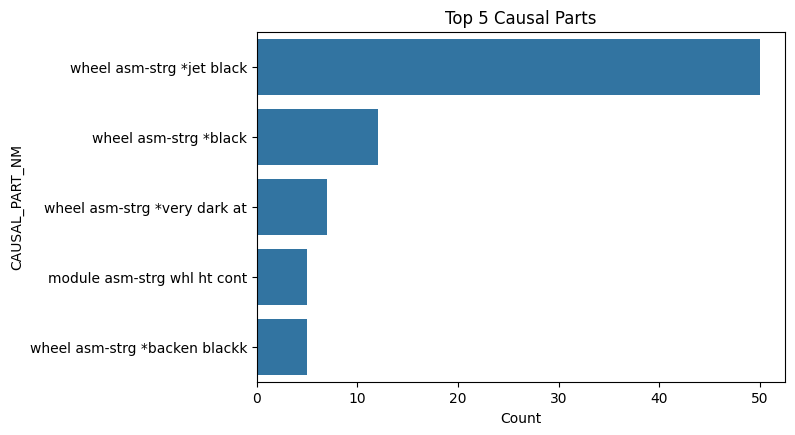

In [176]:
# Create visualizations

# 1. Top Parts Analysis
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
top_parts = df['CAUSAL_PART_NM'].value_counts().head(5)
sns.barplot(x=top_parts.values, y=top_parts.index)
plt.title('Top 5 Causal Parts')
plt.xlabel('Count')
plt.show()

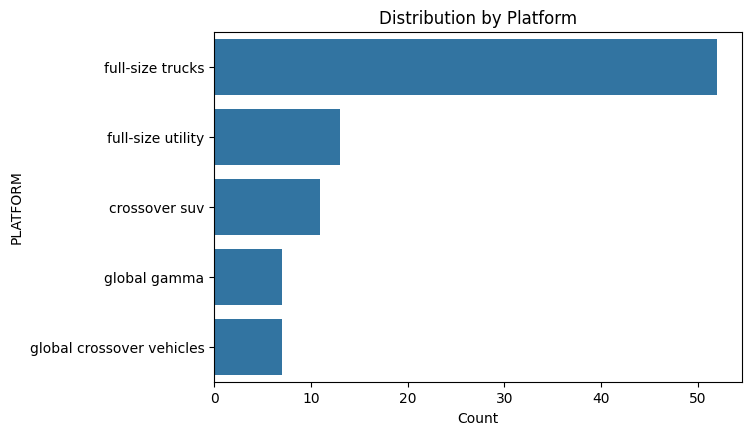

In [177]:
# 2. Platform Distribution
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 2)
platform_counts = df['PLATFORM'].value_counts().head(5)
sns.barplot(x=platform_counts.values, y=platform_counts.index)
plt.title('Distribution by Platform')
plt.xlabel('Count')
plt.show()

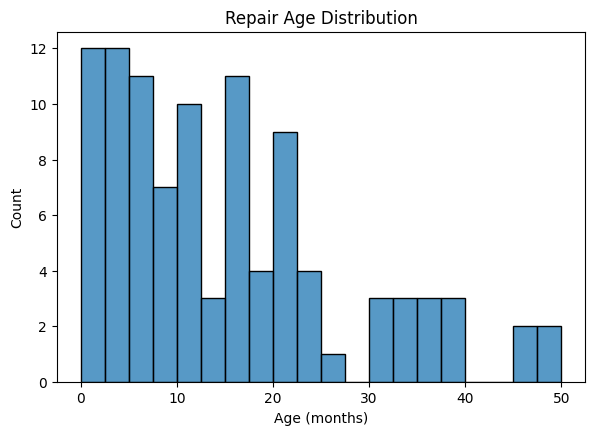

In [178]:
  
# 3. Repair Age Distribution
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 3)
sns.histplot(data=df, x='REPAIR_AGE', bins=20)
plt.title('Repair Age Distribution')
plt.xlabel('Age (months)')
plt.show()

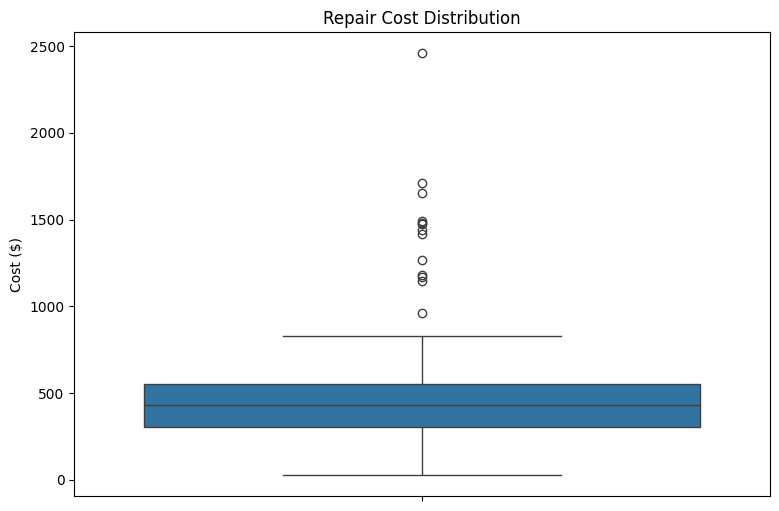

In [179]:
# 4. Cost Distribution
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 4)
sns.boxplot(data=df, y='REPORTING_COST')
plt.title('Repair Cost Distribution')
plt.ylabel('Cost ($)')
plt.tight_layout()
plt.show()

## 4. Generating Tags from Free Text

In [183]:
df[['CUSTOMER_VERBATIM', 'CORRECTION_VERBATIM']].head()

,CUSTOMER_VERBATIM,CORRECTION_VERBATIM
0,steering wheel coming apart,replaced steering wheel now okay
1,customer states heated steering wheel inop,checked - found dtc's u0229 - u1530 set in bcm...
2,owner reports: the super cruise bar on the ste...,approved 4.9(olh) for added diagnostics with t...
3,customer states the lettering and finish on th...,steering wheel replacement
4,c/s: customer states the service driver assist...,replaced steering message no longer displayed


In [ ]:
# Define a keyword
tag_rules = {
    'failure': ['fail', 'failure', 'not working', 'stuck'],
    'error': ['error', 'fault'],
    'component issue': ['component', 'part', 'assembly', 'module'],
    'delay': ['delay', 'late', 'slow', 'hold'],
    'leakage': ['leak', 'spillage', 'drip'],
    'overheating': ['overheat', 'heat', 'high temperature'],
    'physical damage': ['broken', 'damage', 'crack', 'bent'],
    'noise issue': ['noisy', 'noise'],
    'electrical issue': ['short circuit', 'spark', 'electrical', 'wiring'],
    'mechanical issue': ['jam', 'seize', 'mechanical'],
    'software issue': ['software', 'firmware', 'update']
}

# Tag generation function
def tags(text):
    if pd.isna(text):
        return 'general'
    
    text = text.lower()
    found_tags = []
    
    for tag, keywords in tag_rules.items():
        for keyword in keywords:
            if keyword in text:
                found_tags.append(tag)
                break  # Stop after finding one keyword under each tag

    if not found_tags:
        return 'general'
    
    return ', '.join(found_tags)

# Apply tag generation to both columns
df['CUSTOMER_TAGS'] = df['CUSTOMER_VERBATIM'].apply(tags)
df['CORRECTION_TAGS'] = df['CORRECTION_VERBATIM'].apply(tags)

# Quick check
df[['CUSTOMER_VERBATIM', 'CUSTOMER_TAGS', 'CORRECTION_VERBATIM', 'CORRECTION_TAGS']].head()

,CUSTOMER_VERBATIM,CUSTOMER_TAGS,CORRECTION_VERBATIM,CORRECTION_TAGS
0,steering wheel coming apart,component issue,replaced steering wheel now okay,general
1,customer states heated steering wheel inop,overheating,checked - found dtc's u0229 - u1530 set in bcm...,"error, component issue, overheating, electrica..."
2,owner reports: the super cruise bar on the ste...,general,approved 4.9(olh) for added diagnostics with t...,"component issue, software issue"
3,customer states the lettering and finish on th...,general,steering wheel replacement,general
4,c/s: customer states the service driver assist...,general,replaced steering message no longer displayed,general


## 5. Summary and Insights

In [185]:
if free_text_column:
    print("\nTag Distribution:\n")
    print(df['CUSTOMER_TAGS'].value_counts(),"\n")
    print(df['CORRECTION_TAGS'].value_counts())

print("\nActionable Recommendations:")
print("- Focus on areas with high failure and error tags.")
print("- Improve component quality to reduce failures.")
print("- Address common delay issues highlighted in text fields.")

print("\nDiscrepancies Found and Approach:")
print("- Missing values were handled using median/mode imputation.")
print("- CAMPAIGN_NBR: column 100% missing")
print("- Inconsistencies in text were addressed by making all text lowercase and stripping whitespaces.")
print("- Outliers were identified but no deletion performed (needs business validation).")


Tag Distribution:

CUSTOMER_TAGS
general                                         47
component issue                                 20
overheating                                     18
noise issue                                      3
physical damage                                  2
failure, overheating                             2
component issue, overheating                     2
failure, component issue, overheating            1
failure, error, component issue, delay           1
component issue, overheating, software issue     1
failure, electrical issue                        1
electrical issue                                 1
component issue, electrical issue                1
Name: count, dtype: int64 

CORRECTION_TAGS
general                                                  63
component issue                                          13
component issue, overheating                              9
overheating                                               5
component issue, so

In [182]:
# Save cleaned dataset
df.to_excel("TASK-2-Cleaned.xlsx", index=False)
print("\nCleaned data saved as TASK-2-Cleaned.xlsx")


Cleaned data saved as TASK-2-Cleaned.xlsx
